In [34]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn 
import matplotlib.pyplot as plt
import random

In [35]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
# device = torch.device('cpu')
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cuda


In [36]:
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [37]:
training_epochs = 15
batch_size = 100

In [38]:
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='MNIST_data/',
                          train=False,
                          transform=transforms.ToTensor(),
                          download=True)

In [39]:
data_loader = DataLoader(dataset=mnist_train,
                         batch_size=batch_size,
                         shuffle=True,
                         drop_last=True)

In [40]:
linear = nn.Linear(784, 10, bias=True).to(device)

In [41]:
criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [42]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)
    

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)
        

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535146713
Epoch: 0002 cost = 0.359576792
Epoch: 0003 cost = 0.331263006
Epoch: 0004 cost = 0.316403985
Epoch: 0005 cost = 0.307106525
Epoch: 0006 cost = 0.300456434
Epoch: 0007 cost = 0.294932842
Epoch: 0008 cost = 0.290955842
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281915396
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636290
Epoch: 0014 cost = 0.275875181
Epoch: 0015 cost = 0.274422675
Epoch: 0016 cost = 0.270917982
Epoch: 0017 cost = 0.270578980
Epoch: 0018 cost = 0.270430654
Epoch: 0019 cost = 0.270341098
Epoch: 0020 cost = 0.270284593
Epoch: 0021 cost = 0.270243347
Epoch: 0022 cost = 0.270206839
Epoch: 0023 cost = 0.270176500
Epoch: 0024 cost = 0.270149976
Epoch: 0025 cost = 0.270124674
Epoch: 0026 cost = 0.270103127
Epoch: 0027 cost = 0.270082384
Epoch: 0028 cost = 0.270058244
Epoch: 0029 cost = 0.270040691
Epoch: 0030 cost = 0.270021200
Epoch: 0031 cost = 0.270003349
Epoch: 0032 cost = 0.269985735
Epoch: 0

Accuracy: 0.8851000070571899
Label:  4
Prediction:  4


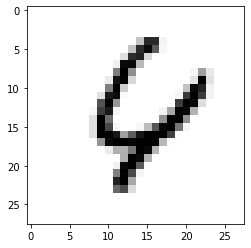

In [47]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)
    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = 121
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()